In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns

In [4]:
df=pd.read_csv("airline_satisfaction.csv")

In [5]:
print("Keys of the dataset:{}".format(df.keys()))

Keys of the dataset:Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [6]:
df.head

<bound method NDFrame.head of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
129875       25971   78463    Male  disloyal Customer   34  Business travel   
129876       25972   71167    Male     Loyal Customer   23  Business travel   
129877       25973   37675  Female     Loyal Customer   17  Personal Travel   
129878       25974   90086    Male     Loyal Customer   14  Business travel   
129879       25975   34799  Female     Loyal Customer   42  Personal Travel   

           Class  Fli

In [7]:
y = df.satisfaction.values
categorical_variables = ["Gender","Customer Type","Type of Travel","Class","Inflight wifi service",
                         "Departure/Arrival time convenient","Ease of Online booking",
                         "Gate location","Food and drink","Online boarding","Seat comfort",
                         "Inflight entertainment","On-board service","Leg room service",
                         "Baggage handling","Checkin service","Inflight service",
                         "Cleanliness"]
quantitative_variables = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

In [41]:
y

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied'], dtype=object)

## Encoding categorical variables

#### One-hot encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
one_hot_encoder = OneHotEncoder()

In [10]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

In [11]:
one_hot_encoded_X.toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [12]:
one_hot_encoder.get_feature_names_out()

array(['x0_Female', 'x0_Male', 'x1_Loyal Customer',
       'x1_disloyal Customer', 'x2_Business travel', 'x2_Personal Travel',
       'x3_Business', 'x3_Eco', 'x3_Eco Plus', 'x4_0', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x5_0', 'x5_1', 'x5_2', 'x5_3', 'x5_4',
       'x5_5', 'x6_0', 'x6_1', 'x6_2', 'x6_3', 'x6_4', 'x6_5', 'x7_0',
       'x7_1', 'x7_2', 'x7_3', 'x7_4', 'x7_5', 'x8_0', 'x8_1', 'x8_2',
       'x8_3', 'x8_4', 'x8_5', 'x9_0', 'x9_1', 'x9_2', 'x9_3', 'x9_4',
       'x9_5', 'x10_0', 'x10_1', 'x10_2', 'x10_3', 'x10_4', 'x10_5',
       'x11_0', 'x11_1', 'x11_2', 'x11_3', 'x11_4', 'x11_5', 'x12_0',
       'x12_1', 'x12_2', 'x12_3', 'x12_4', 'x12_5', 'x13_0', 'x13_1',
       'x13_2', 'x13_3', 'x13_4', 'x13_5', 'x14_1', 'x14_2', 'x14_3',
       'x14_4', 'x14_5', 'x15_0', 'x15_1', 'x15_2', 'x15_3', 'x15_4',
       'x15_5', 'x16_0', 'x16_1', 'x16_2', 'x16_3', 'x16_4', 'x16_5',
       'x17_0', 'x17_1', 'x17_2', 'x17_3', 'x17_4', 'x17_5'], dtype=object)

In [13]:
one_hot_encoded_X

<129880x92 sparse matrix of type '<class 'numpy.float64'>'
	with 2337840 stored elements in Compressed Sparse Row format>

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("Number of new columns generated after one-hot encoding:", df_encoded.shape[1] - df.shape[1])

Number of new columns generated after one-hot encoding: 6


In [15]:
df_quantitative=df[quantitative_variables]

In [16]:
X_encoded = pd.concat([df_quantitative, df_encoded], axis=1)

#### Ordinal encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
encoded_vars = []
for categorical_var in X_categorical.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: ['Female' 'Male']
===== Encoded classes: ['Loyal Customer' 'disloyal Customer']
===== Encoded classes: ['Business travel' 'Personal Travel']
===== Encoded classes: ['Business' 'Eco' 'Eco Plus']
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]
===== Encoded classes: [0 1 2 3 4 5]


In [20]:
X_categorical = np.array(encoded_vars).T

In [21]:
X_categorical

array([[1, 0, 1, ..., 4, 5, 5],
       [1, 1, 0, ..., 1, 4, 1],
       [0, 0, 0, ..., 4, 4, 5],
       ...,
       [0, 0, 1, ..., 5, 4, 2],
       [1, 0, 0, ..., 4, 5, 4],
       [0, 0, 1, ..., 1, 1, 1]])

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [23]:
X_labelled_categories = np.concatenate([df[col].values.reshape(-1, 1) for col in categorical_cols], axis=1)

In [24]:
X_encoded=np.concatenate([X_quantitative, X_labelled_categories],axis=1)

In [25]:
print(X_encoded)

[[1.300e+01 4.600e+02 2.500e+01 ... 1.000e+00 2.000e+00 0.000e+00]
 [2.500e+01 2.350e+02 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.600e+01 1.142e+03 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [1.700e+01 8.280e+02 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.400e+01 1.127e+03 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [4.200e+01 2.640e+02 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]]


## Imputing missing values

### Static imputation

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_quantitative)

X_imputed = simple_imputer.transform(X_quantitative)

In [28]:
X_imputed

array([[1.300e+01, 4.600e+02, 2.500e+01, 1.800e+01],
       [2.500e+01, 2.350e+02, 1.000e+00, 6.000e+00],
       [2.600e+01, 1.142e+03, 0.000e+00, 0.000e+00],
       ...,
       [1.700e+01, 8.280e+02, 0.000e+00, 0.000e+00],
       [1.400e+01, 1.127e+03, 0.000e+00, 0.000e+00],
       [4.200e+01, 2.640e+02, 0.000e+00, 0.000e+00]])

In [29]:
simple_imputer_mean = SimpleImputer(strategy="mean")
simple_imputer_median = SimpleImputer(strategy="median")

In [30]:
simple_imputer_mean.fit(X_quantitative)

SimpleImputer()

In [31]:
simple_imputer_median.fit(X_quantitative)

SimpleImputer(strategy='median')

In [32]:
X_imputed_mean = simple_imputer_mean.transform(X_quantitative)
X_imputed_median = simple_imputer_median.transform(X_quantitative)

In [33]:
#original_stats = X_quantitative.describe()
#imputed_mean_stats = X_imputed_mean.describe()
#imputed_median_stats = X_imputed_median.describe()

### KNN imputation

In [37]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_quantitative)

KNNImputer()

## Feature transformation

In [38]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_quantitative)
scaled_quantitative = min_max_scaler.transform(X_quantitative)

# Autre manière de calculer la matrice transformée:
# scaled_quantitative = min_max_scaler.fit_transform(X_quantitative)

In [40]:
plt.scatter(X_quantitative[:,0], X_quantitative[:,1], c=y)
plt.xlabel("Defense")
plt.ylabel("XP growth")
plt.title("Yellow = legendary, Purple = non legendary")

NameError: name 'yellow' is not defined

**HORS COURS**

In [36]:
gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_map)

In [37]:
satisfaction_map = {'neutral or dissatisfied': 0, 'satisfied': 1}
df['satisfaction'] = df['satisfaction'].map(satisfaction_map)

In [38]:
customer_type_map = {'disloyal Customer': 0, 'Loyal Customer': 1}
df['Customer Type'] = df['Customer Type'].map(customer_type_map)

In [39]:
X=df[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].values
y=df["satisfaction"].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['satisfaction']),df['satisfaction'],random_state=0)

In [9]:
print("X_train shape:{}".format(X_train.shape))

X_train shape:(7, 24)


In [10]:
print("y_train shape:{}".format(y_train.shape))

y_train shape:(7,)


In [11]:
print("X_test shape:{}".format(X_test.shape))

X_test shape:(3, 24)


In [12]:
print("y_test shape:{}".format(y_test.shape))

y_test shape:(3,)


In [13]:
dataframe = pd.DataFrame(X_train, columns=df.columns[:-1])

In [14]:
dataframe['satisfaction'] = y_train

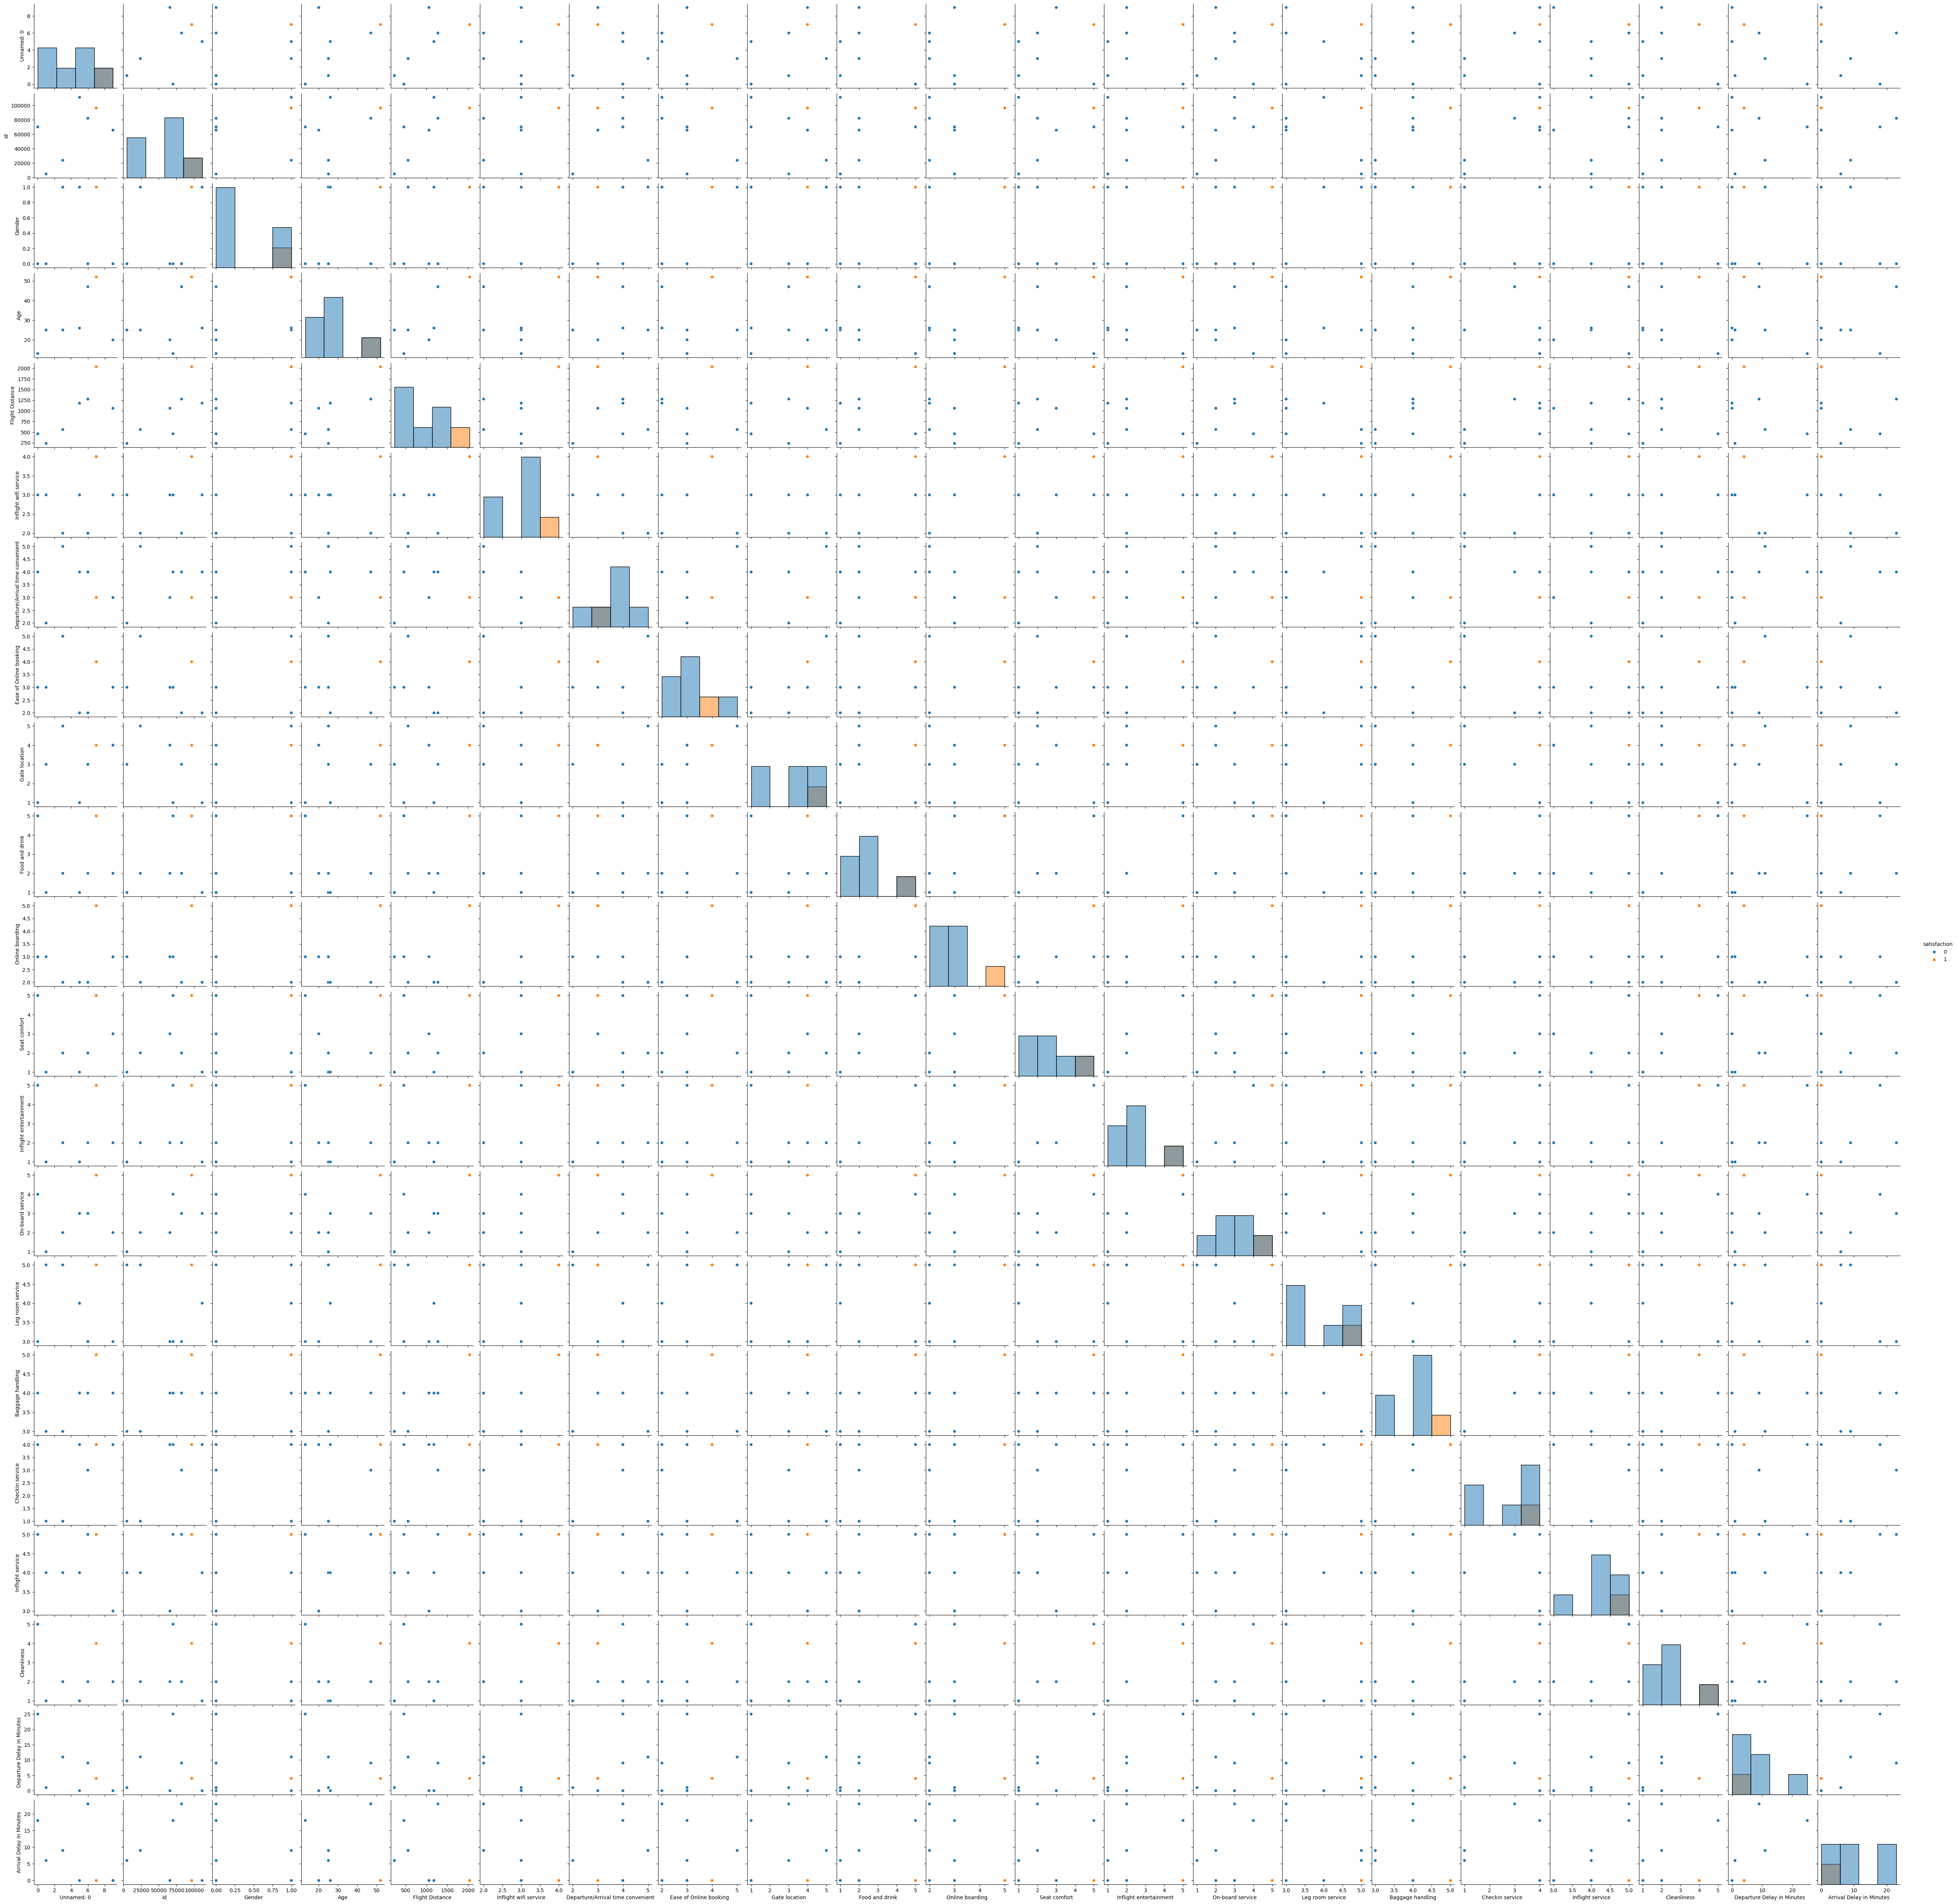

In [15]:
sns.pairplot(dataframe, hue='satisfaction',diag_kind="hist")

In [18]:
# Afficher le graphique
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train,y_train)

ValueError: could not convert string to float: 'disloyal Customer'